In [ ]:
#!git clone https://github.com/Marlup/Simulation-of-investment-and-compound-returns.git

In [1]:
# data processing
import numpy as np
import pandas as pd
# pyplot
from matplotlib import pyplot as plt
# seaborn
import seaborn as sns
# bokeh
from bokeh import plotting as bk
from bokeh.models import Span
from bokeh.io import output_notebook
from bokeh.models import HoverTool, ColumnDataSource
import os
output_notebook()

# Compound utils
from compound import (
    get_compound_return,
    simulate_compound_return,
    build_dataframe,
    MONTHS_IN_YEAR,
    DEFAULT_RETIREMENT_YEARS,
    define_scenario,
    plot_scenario_bokeh
)

Loading BokehJS ...

In [2]:
CURRENCY = "€"

In [ ]:
os.chdir("./Simulation-of-investment-and-compound-returns")

In [3]:
sns.set_style('darkgrid')
sns.color_palette("Paired")
sns.set_palette("Paired")

### Calculation of composed return. Composed return function

In [4]:
# Calculation of composed return. Composed return function
principal_amount = 10_000
annual_contribution = 200 * 12
roi = 0.075
years = 30
compounding_frequency = 12

periodic_contribution = annual_contribution / compounding_frequency

amount, accum_roi = get_compound_return(
    principal_amount,
    roi,
    compounding_frequency,
    periodic_contribution,
    years,
    True
    )
print(f"Total amount {amount}")
print(f"Accumulated roi {accum_roi}")

Total amount 116672.76
Accumulated roi 9.42


### Estimation of composed return. Simulation

Scenario

In [12]:
# @title Investing parameters for yields scenario

# Define initial parameters
initial_principal = 10000 # @param {type:"number", "min": 0.0, "max": 1.0e9}
monthly_contribution = 200 # @param {type:"number", "min": 0.0, "max": 1.0e9}
annual_contribution = monthly_contribution * 12
inc_contribution_rate = 0.05
annual_roi = 0.08 # @param {type:"number", "min": 0.0, "max": 1.0}
duration = 60 # @param {type:"slider", "min": 0.0, "max": 150, "step": 1}
retirement_at = 30 # @param {type:"slider", "min": 0, "max": 150, "step": 1}
retirement_income = 1000 # @param {type:"number", "min": 0.0, "max": 1.0e9}
retirement_contribution_ratio = 0.1# @param {type:"number", "min": 0.001, "max": 1.0}
retirement_contribution = retirement_contribution_ratio * annual_contribution
inflation_rate = 0.03
tax_rate = 0.25
 # Compounding once per year
compounding_frequency = 12 # @param {type:"slider", "min": 0, "max": 24, "step": 1}

# Calculate the total balance and earnings using the updated function
total_balance, earnings, balances = simulate_compound_return(
    principal=initial_principal,
    annual_roi=annual_roi,
    compounding_frequency=compounding_frequency,
    annual_contribution=annual_contribution,
    inc_contribution_rate=inc_contribution_rate,
    investment_duration=duration,
    retirement_at=retirement_at,
    retirement_income=retirement_income,
    retirement_contribution=retirement_contribution,
    inflation_rate=inflation_rate,
    tax_rate=tax_rate,
    return_time_yields=True
)

# Calculate total earnings, total input contribution, and earnings per contribution
total_earnings = sum(earnings)

# Print the results
print(f"Total balance after {duration} years:", round(total_balance, 2))
print("Total earnings:", round(total_earnings, 2))

# Basic plot setup
renderer_e, renderer_b = plot_scenario_bokeh(earnings,
                                             balances,
                                             initial_principal)

_ , _= bk.show(renderer_e), bk.show(renderer_b)

Max monthly contribution 893.5488628012221
Total balance after 60 years: 61785.25
Total earnings: 5265127.74


In [28]:
step_amount = 5_000
max_amount = 20_000
initial_amounts = np.arange(step_amount,
                            max_amount + step_amount,
                            step_amount)
terms = (1, 6, 12)
virtual_returns = np.arange(0.06, 0.1, 0.01)
yearly_contributions = list(map(lambda x: 12 * x, range(50, 500, 50)))
inc_contributions = [0.01, 0.03, 0.05, 0.1]
years_of_investment = [31, 40, 50, 60]#np.arange(30, 30 + 5, 5)
inflation_rates = [0.02, 0.03, 0.04]#np.arange(30, 30 + 5, 5)
retirement_years = 30
retir_incomes = [
    0.5e3,
    1.0e3,
    1.5e3,
    2.0e3
    ]
tax_rate = 0.25
retirement_contribution_rate = 0.1

results = define_scenario(initial_amounts,
                          virtual_returns,
                          years_of_investment,
                          terms,
                          yearly_contributions,
                          inc_contributions,
                          inflation_rates,
                          retirement_years,
                          retir_incomes,
                          retirement_contribution_rate,
                          tax_rate
                          )

df = build_dataframe(results)
df

Max monthly contribution 67.48450897201415
Max monthly contribution 122.84211057478412
Max monthly contribution 223.38721570030552
Max monthly contribution 991.8699686650255
Max monthly contribution 67.48450897201415
Max monthly contribution 122.84211057478412
Max monthly contribution 223.38721570030552
Max monthly contribution 991.8699686650255
Max monthly contribution 67.48450897201415
Max monthly contribution 122.84211057478412
Max monthly contribution 223.38721570030552
Max monthly contribution 991.8699686650255
Max monthly contribution 67.48450897201415
Max monthly contribution 122.84211057478412
Max monthly contribution 223.38721570030552
Max monthly contribution 991.8699686650255
Max monthly contribution 67.48450897201415
Max monthly contribution 122.84211057478412
Max monthly contribution 223.38721570030552
Max monthly contribution 991.8699686650255
Max monthly contribution 67.48450897201415
Max monthly contribution 122.84211057478412
Max monthly contribution 223.38721570030552

Max monthly contribution 446.77443140061104
Max monthly contribution 1983.739937330051
Max monthly contribution 134.9690179440283
Max monthly contribution 245.68422114956823
Max monthly contribution 446.77443140061104
Max monthly contribution 1983.739937330051
Max monthly contribution 134.9690179440283
Max monthly contribution 245.68422114956823
Max monthly contribution 446.77443140061104
Max monthly contribution 1983.739937330051
Max monthly contribution 134.9690179440283
Max monthly contribution 245.68422114956823
Max monthly contribution 446.77443140061104
Max monthly contribution 1983.739937330051
Max monthly contribution 134.9690179440283
Max monthly contribution 245.68422114956823
Max monthly contribution 446.77443140061104
Max monthly contribution 1983.739937330051
Max monthly contribution 134.9690179440283
Max monthly contribution 245.68422114956823
Max monthly contribution 446.77443140061104
Max monthly contribution 1983.739937330051
Max monthly contribution 134.9690179440283


Max monthly contribution 2010.4849413027525
Max monthly contribution 8926.829717985232
Max monthly contribution 607.3605807481287
Max monthly contribution 1105.578995173057
Max monthly contribution 2010.4849413027525
Max monthly contribution 8926.829717985232
Max monthly contribution 607.3605807481287
Max monthly contribution 1105.578995173057
Max monthly contribution 2010.4849413027525
Max monthly contribution 8926.829717985232
Max monthly contribution 607.3605807481287
Max monthly contribution 1105.578995173057
Max monthly contribution 2010.4849413027525
Max monthly contribution 8926.829717985232
Max monthly contribution 67.48450897201415
Max monthly contribution 122.84211057478412
Max monthly contribution 223.38721570030552
Max monthly contribution 991.8699686650255
Max monthly contribution 67.48450897201415
Max monthly contribution 122.84211057478412
Max monthly contribution 223.38721570030552
Max monthly contribution 991.8699686650255
Max monthly contribution 67.48450897201415
Max

Max monthly contribution 1983.739937330051
Max monthly contribution 134.9690179440283
Max monthly contribution 245.68422114956823
Max monthly contribution 446.77443140061104
Max monthly contribution 1983.739937330051
Max monthly contribution 134.9690179440283
Max monthly contribution 245.68422114956823
Max monthly contribution 446.77443140061104
Max monthly contribution 1983.739937330051
Max monthly contribution 134.9690179440283
Max monthly contribution 245.68422114956823
Max monthly contribution 446.77443140061104
Max monthly contribution 1983.739937330051
Max monthly contribution 134.9690179440283
Max monthly contribution 245.68422114956823
Max monthly contribution 446.77443140061104
Max monthly contribution 1983.739937330051
Max monthly contribution 134.9690179440283
Max monthly contribution 245.68422114956823
Max monthly contribution 446.77443140061104
Max monthly contribution 1983.739937330051
Max monthly contribution 134.9690179440283
Max monthly contribution 245.68422114956823


Max monthly contribution 337.4225448600716
Max monthly contribution 614.21055287392
Max monthly contribution 1116.9360785015278
Max monthly contribution 4959.349843325121
Max monthly contribution 337.4225448600716
Max monthly contribution 614.21055287392
Max monthly contribution 1116.9360785015278
Max monthly contribution 4959.349843325121
Max monthly contribution 337.4225448600716
Max monthly contribution 614.21055287392
Max monthly contribution 1116.9360785015278
Max monthly contribution 4959.349843325121
Max monthly contribution 337.4225448600716
Max monthly contribution 614.21055287392
Max monthly contribution 1116.9360785015278
Max monthly contribution 4959.349843325121
Max monthly contribution 337.4225448600716
Max monthly contribution 614.21055287392
Max monthly contribution 1116.9360785015278
Max monthly contribution 4959.349843325121
Max monthly contribution 337.4225448600716
Max monthly contribution 614.21055287392
Max monthly contribution 1116.9360785015278
Max monthly contr

Max monthly contribution 982.7368845982729
Max monthly contribution 1787.0977256024441
Max monthly contribution 7934.959749320204
Max monthly contribution 539.8760717761132
Max monthly contribution 982.7368845982729
Max monthly contribution 1787.0977256024441
Max monthly contribution 7934.959749320204
Max monthly contribution 539.8760717761132
Max monthly contribution 982.7368845982729
Max monthly contribution 1787.0977256024441
Max monthly contribution 7934.959749320204
Max monthly contribution 607.3605807481287
Max monthly contribution 1105.578995173057
Max monthly contribution 2010.4849413027525
Max monthly contribution 8926.829717985232
Max monthly contribution 607.3605807481287
Max monthly contribution 1105.578995173057
Max monthly contribution 2010.4849413027525
Max monthly contribution 8926.829717985232
Max monthly contribution 607.3605807481287
Max monthly contribution 1105.578995173057
Max monthly contribution 2010.4849413027525
Max monthly contribution 8926.829717985232
Max m

Max monthly contribution 8926.829717985232
Max monthly contribution 607.3605807481287
Max monthly contribution 1105.578995173057
Max monthly contribution 2010.4849413027525
Max monthly contribution 8926.829717985232
Max monthly contribution 607.3605807481287
Max monthly contribution 1105.578995173057
Max monthly contribution 2010.4849413027525
Max monthly contribution 8926.829717985232
Max monthly contribution 607.3605807481287
Max monthly contribution 1105.578995173057
Max monthly contribution 2010.4849413027525
Max monthly contribution 8926.829717985232
Max monthly contribution 607.3605807481287
Max monthly contribution 1105.578995173057
Max monthly contribution 2010.4849413027525
Max monthly contribution 8926.829717985232
Max monthly contribution 607.3605807481287
Max monthly contribution 1105.578995173057
Max monthly contribution 2010.4849413027525
Max monthly contribution 8926.829717985232
Max monthly contribution 607.3605807481287
Max monthly contribution 1105.578995173057
Max mo

Max monthly contribution 337.4225448600716
Max monthly contribution 614.21055287392
Max monthly contribution 1116.9360785015278
Max monthly contribution 4959.349843325121
Max monthly contribution 337.4225448600716
Max monthly contribution 614.21055287392
Max monthly contribution 1116.9360785015278
Max monthly contribution 4959.349843325121
Max monthly contribution 337.4225448600716
Max monthly contribution 614.21055287392
Max monthly contribution 1116.9360785015278
Max monthly contribution 4959.349843325121
Max monthly contribution 337.4225448600716
Max monthly contribution 614.21055287392
Max monthly contribution 1116.9360785015278
Max monthly contribution 4959.349843325121
Max monthly contribution 337.4225448600716
Max monthly contribution 614.21055287392
Max monthly contribution 1116.9360785015278
Max monthly contribution 4959.349843325121
Max monthly contribution 404.907053832085
Max monthly contribution 737.0526634487047
Max monthly contribution 1340.32329420183
Max monthly contri

Max monthly contribution 991.8699686650255
Max monthly contribution 67.48450897201415
Max monthly contribution 122.84211057478412
Max monthly contribution 223.38721570030552
Max monthly contribution 991.8699686650255
Max monthly contribution 67.48450897201415
Max monthly contribution 122.84211057478412
Max monthly contribution 223.38721570030552
Max monthly contribution 991.8699686650255
Max monthly contribution 67.48450897201415
Max monthly contribution 122.84211057478412
Max monthly contribution 223.38721570030552
Max monthly contribution 991.8699686650255
Max monthly contribution 67.48450897201415
Max monthly contribution 122.84211057478412
Max monthly contribution 223.38721570030552
Max monthly contribution 991.8699686650255
Max monthly contribution 67.48450897201415
Max monthly contribution 122.84211057478412
Max monthly contribution 223.38721570030552
Max monthly contribution 991.8699686650255
Max monthly contribution 67.48450897201415
Max monthly contribution 122.84211057478412


Max monthly contribution 446.77443140061104
Max monthly contribution 1983.739937330051
Max monthly contribution 134.9690179440283
Max monthly contribution 245.68422114956823
Max monthly contribution 446.77443140061104
Max monthly contribution 1983.739937330051
Max monthly contribution 134.9690179440283
Max monthly contribution 245.68422114956823
Max monthly contribution 446.77443140061104
Max monthly contribution 1983.739937330051
Max monthly contribution 134.9690179440283
Max monthly contribution 245.68422114956823
Max monthly contribution 446.77443140061104
Max monthly contribution 1983.739937330051
Max monthly contribution 134.9690179440283
Max monthly contribution 245.68422114956823
Max monthly contribution 446.77443140061104
Max monthly contribution 1983.739937330051
Max monthly contribution 134.9690179440283
Max monthly contribution 245.68422114956823
Max monthly contribution 446.77443140061104
Max monthly contribution 1983.739937330051
Max monthly contribution 202.4535269160425


Max monthly contribution 991.8699686650255
Max monthly contribution 67.48450897201415
Max monthly contribution 122.84211057478412
Max monthly contribution 223.38721570030552
Max monthly contribution 991.8699686650255
Max monthly contribution 67.48450897201415
Max monthly contribution 122.84211057478412
Max monthly contribution 223.38721570030552
Max monthly contribution 991.8699686650255
Max monthly contribution 134.9690179440283
Max monthly contribution 245.68422114956823
Max monthly contribution 446.77443140061104
Max monthly contribution 1983.739937330051
Max monthly contribution 134.9690179440283
Max monthly contribution 245.68422114956823
Max monthly contribution 446.77443140061104
Max monthly contribution 1983.739937330051
Max monthly contribution 134.9690179440283
Max monthly contribution 245.68422114956823
Max monthly contribution 446.77443140061104
Max monthly contribution 1983.739937330051
Max monthly contribution 134.9690179440283
Max monthly contribution 245.68422114956823


Max monthly contribution 5951.219811990159
Max monthly contribution 404.907053832085
Max monthly contribution 737.0526634487047
Max monthly contribution 1340.32329420183
Max monthly contribution 5951.219811990159
Max monthly contribution 404.907053832085
Max monthly contribution 737.0526634487047
Max monthly contribution 1340.32329420183
Max monthly contribution 5951.219811990159
Max monthly contribution 404.907053832085
Max monthly contribution 737.0526634487047
Max monthly contribution 1340.32329420183
Max monthly contribution 5951.219811990159
Max monthly contribution 404.907053832085
Max monthly contribution 737.0526634487047
Max monthly contribution 1340.32329420183
Max monthly contribution 5951.219811990159
Max monthly contribution 404.907053832085
Max monthly contribution 737.0526634487047
Max monthly contribution 1340.32329420183
Max monthly contribution 5951.219811990159
Max monthly contribution 472.3915628040995
Max monthly contribution 859.8947740234881
Max monthly contribut

Max monthly contribution 893.5488628012221
Max monthly contribution 3967.479874660102
Max monthly contribution 269.9380358880566
Max monthly contribution 491.36844229913646
Max monthly contribution 893.5488628012221
Max monthly contribution 3967.479874660102
Max monthly contribution 269.9380358880566
Max monthly contribution 491.36844229913646
Max monthly contribution 893.5488628012221
Max monthly contribution 3967.479874660102
Max monthly contribution 269.9380358880566
Max monthly contribution 491.36844229913646
Max monthly contribution 893.5488628012221
Max monthly contribution 3967.479874660102
Max monthly contribution 269.9380358880566
Max monthly contribution 491.36844229913646
Max monthly contribution 893.5488628012221
Max monthly contribution 3967.479874660102
Max monthly contribution 269.9380358880566
Max monthly contribution 491.36844229913646
Max monthly contribution 893.5488628012221
Max monthly contribution 3967.479874660102
Max monthly contribution 269.9380358880566
Max mo

Max monthly contribution 202.4535269160425
Max monthly contribution 368.52633172435236
Max monthly contribution 670.161647100915
Max monthly contribution 2975.6099059950793
Max monthly contribution 202.4535269160425
Max monthly contribution 368.52633172435236
Max monthly contribution 670.161647100915
Max monthly contribution 2975.6099059950793
Max monthly contribution 202.4535269160425
Max monthly contribution 368.52633172435236
Max monthly contribution 670.161647100915
Max monthly contribution 2975.6099059950793
Max monthly contribution 202.4535269160425
Max monthly contribution 368.52633172435236
Max monthly contribution 670.161647100915
Max monthly contribution 2975.6099059950793
Max monthly contribution 202.4535269160425
Max monthly contribution 368.52633172435236
Max monthly contribution 670.161647100915
Max monthly contribution 2975.6099059950793
Max monthly contribution 269.9380358880566
Max monthly contribution 491.36844229913646
Max monthly contribution 893.5488628012221
Max m

Max monthly contribution 1563.710509902139
Max monthly contribution 6943.0897806551675
Max monthly contribution 472.3915628040995
Max monthly contribution 859.8947740234881
Max monthly contribution 1563.710509902139
Max monthly contribution 6943.0897806551675
Max monthly contribution 472.3915628040995
Max monthly contribution 859.8947740234881
Max monthly contribution 1563.710509902139
Max monthly contribution 6943.0897806551675
Max monthly contribution 472.3915628040995
Max monthly contribution 859.8947740234881
Max monthly contribution 1563.710509902139
Max monthly contribution 6943.0897806551675
Max monthly contribution 472.3915628040995
Max monthly contribution 859.8947740234881
Max monthly contribution 1563.710509902139
Max monthly contribution 6943.0897806551675
Max monthly contribution 472.3915628040995
Max monthly contribution 859.8947740234881
Max monthly contribution 1563.710509902139
Max monthly contribution 6943.0897806551675
Max monthly contribution 472.3915628040995
Max m

Max monthly contribution 4959.349843325121
Max monthly contribution 337.4225448600716
Max monthly contribution 614.21055287392
Max monthly contribution 1116.9360785015278
Max monthly contribution 4959.349843325121
Max monthly contribution 337.4225448600716
Max monthly contribution 614.21055287392
Max monthly contribution 1116.9360785015278
Max monthly contribution 4959.349843325121
Max monthly contribution 337.4225448600716
Max monthly contribution 614.21055287392
Max monthly contribution 1116.9360785015278
Max monthly contribution 4959.349843325121
Max monthly contribution 337.4225448600716
Max monthly contribution 614.21055287392
Max monthly contribution 1116.9360785015278
Max monthly contribution 4959.349843325121
Max monthly contribution 337.4225448600716
Max monthly contribution 614.21055287392
Max monthly contribution 1116.9360785015278
Max monthly contribution 4959.349843325121
Max monthly contribution 337.4225448600716
Max monthly contribution 614.21055287392
Max monthly contri

Max monthly contribution 1340.32329420183
Max monthly contribution 5951.219811990159
Max monthly contribution 404.907053832085
Max monthly contribution 737.0526634487047
Max monthly contribution 1340.32329420183
Max monthly contribution 5951.219811990159
Max monthly contribution 404.907053832085
Max monthly contribution 737.0526634487047
Max monthly contribution 1340.32329420183
Max monthly contribution 5951.219811990159
Max monthly contribution 404.907053832085
Max monthly contribution 737.0526634487047
Max monthly contribution 1340.32329420183
Max monthly contribution 5951.219811990159
Max monthly contribution 404.907053832085
Max monthly contribution 737.0526634487047
Max monthly contribution 1340.32329420183
Max monthly contribution 5951.219811990159
Max monthly contribution 404.907053832085
Max monthly contribution 737.0526634487047
Max monthly contribution 1340.32329420183
Max monthly contribution 5951.219811990159
Max monthly contribution 404.907053832085
Max monthly contributio

Max monthly contribution 337.4225448600716
Max monthly contribution 614.21055287392
Max monthly contribution 1116.9360785015278
Max monthly contribution 4959.349843325121
Max monthly contribution 337.4225448600716
Max monthly contribution 614.21055287392
Max monthly contribution 1116.9360785015278
Max monthly contribution 4959.349843325121
Max monthly contribution 337.4225448600716
Max monthly contribution 614.21055287392
Max monthly contribution 1116.9360785015278
Max monthly contribution 4959.349843325121
Max monthly contribution 337.4225448600716
Max monthly contribution 614.21055287392
Max monthly contribution 1116.9360785015278
Max monthly contribution 4959.349843325121
Max monthly contribution 337.4225448600716
Max monthly contribution 614.21055287392
Max monthly contribution 1116.9360785015278
Max monthly contribution 4959.349843325121
Max monthly contribution 404.907053832085
Max monthly contribution 737.0526634487047
Max monthly contribution 1340.32329420183
Max monthly contri

Max monthly contribution 337.4225448600716
Max monthly contribution 614.21055287392
Max monthly contribution 1116.9360785015278
Max monthly contribution 4959.349843325121
Max monthly contribution 337.4225448600716
Max monthly contribution 614.21055287392
Max monthly contribution 1116.9360785015278
Max monthly contribution 4959.349843325121
Max monthly contribution 337.4225448600716
Max monthly contribution 614.21055287392
Max monthly contribution 1116.9360785015278
Max monthly contribution 4959.349843325121
Max monthly contribution 337.4225448600716
Max monthly contribution 614.21055287392
Max monthly contribution 1116.9360785015278
Max monthly contribution 4959.349843325121
Max monthly contribution 337.4225448600716
Max monthly contribution 614.21055287392
Max monthly contribution 1116.9360785015278
Max monthly contribution 4959.349843325121
Max monthly contribution 404.907053832085
Max monthly contribution 737.0526634487047
Max monthly contribution 1340.32329420183
Max monthly contri

Max monthly contribution 1563.710509902139
Max monthly contribution 6943.0897806551675
Max monthly contribution 472.3915628040995
Max monthly contribution 859.8947740234881
Max monthly contribution 1563.710509902139
Max monthly contribution 6943.0897806551675
Max monthly contribution 472.3915628040995
Max monthly contribution 859.8947740234881
Max monthly contribution 1563.710509902139
Max monthly contribution 6943.0897806551675
Max monthly contribution 472.3915628040995
Max monthly contribution 859.8947740234881
Max monthly contribution 1563.710509902139
Max monthly contribution 6943.0897806551675
Max monthly contribution 472.3915628040995
Max monthly contribution 859.8947740234881
Max monthly contribution 1563.710509902139
Max monthly contribution 6943.0897806551675
Max monthly contribution 539.8760717761132
Max monthly contribution 982.7368845982729
Max monthly contribution 1787.0977256024441
Max monthly contribution 7934.959749320204
Max monthly contribution 539.8760717761132
Max m

Max monthly contribution 269.9380358880566
Max monthly contribution 491.36844229913646
Max monthly contribution 893.5488628012221
Max monthly contribution 3967.479874660102
Max monthly contribution 269.9380358880566
Max monthly contribution 491.36844229913646
Max monthly contribution 893.5488628012221
Max monthly contribution 3967.479874660102
Max monthly contribution 337.4225448600716
Max monthly contribution 614.21055287392
Max monthly contribution 1116.9360785015278
Max monthly contribution 4959.349843325121
Max monthly contribution 337.4225448600716
Max monthly contribution 614.21055287392
Max monthly contribution 1116.9360785015278
Max monthly contribution 4959.349843325121
Max monthly contribution 337.4225448600716
Max monthly contribution 614.21055287392
Max monthly contribution 1116.9360785015278
Max monthly contribution 4959.349843325121
Max monthly contribution 337.4225448600716
Max monthly contribution 614.21055287392
Max monthly contribution 1116.9360785015278
Max monthly c

Max monthly contribution 607.3605807481287
Max monthly contribution 1105.578995173057
Max monthly contribution 2010.4849413027525
Max monthly contribution 8926.829717985232
Max monthly contribution 607.3605807481287
Max monthly contribution 1105.578995173057
Max monthly contribution 2010.4849413027525
Max monthly contribution 8926.829717985232
Max monthly contribution 607.3605807481287
Max monthly contribution 1105.578995173057
Max monthly contribution 2010.4849413027525
Max monthly contribution 8926.829717985232
Max monthly contribution 607.3605807481287
Max monthly contribution 1105.578995173057
Max monthly contribution 2010.4849413027525
Max monthly contribution 8926.829717985232
Max monthly contribution 67.48450897201415
Max monthly contribution 122.84211057478412
Max monthly contribution 223.38721570030552
Max monthly contribution 991.8699686650255
Max monthly contribution 67.48450897201415
Max monthly contribution 122.84211057478412
Max monthly contribution 223.38721570030552
Max

Max monthly contribution 202.4535269160425
Max monthly contribution 368.52633172435236
Max monthly contribution 670.161647100915
Max monthly contribution 2975.6099059950793
Max monthly contribution 202.4535269160425
Max monthly contribution 368.52633172435236
Max monthly contribution 670.161647100915
Max monthly contribution 2975.6099059950793
Max monthly contribution 269.9380358880566
Max monthly contribution 491.36844229913646
Max monthly contribution 893.5488628012221
Max monthly contribution 3967.479874660102
Max monthly contribution 269.9380358880566
Max monthly contribution 491.36844229913646
Max monthly contribution 893.5488628012221
Max monthly contribution 3967.479874660102
Max monthly contribution 269.9380358880566
Max monthly contribution 491.36844229913646
Max monthly contribution 893.5488628012221
Max monthly contribution 3967.479874660102
Max monthly contribution 269.9380358880566
Max monthly contribution 491.36844229913646
Max monthly contribution 893.5488628012221
Max m

Max monthly contribution 491.36844229913646
Max monthly contribution 893.5488628012221
Max monthly contribution 3967.479874660102
Max monthly contribution 269.9380358880566
Max monthly contribution 491.36844229913646
Max monthly contribution 893.5488628012221
Max monthly contribution 3967.479874660102
Max monthly contribution 269.9380358880566
Max monthly contribution 491.36844229913646
Max monthly contribution 893.5488628012221
Max monthly contribution 3967.479874660102
Max monthly contribution 269.9380358880566
Max monthly contribution 491.36844229913646
Max monthly contribution 893.5488628012221
Max monthly contribution 3967.479874660102
Max monthly contribution 269.9380358880566
Max monthly contribution 491.36844229913646
Max monthly contribution 893.5488628012221
Max monthly contribution 3967.479874660102
Max monthly contribution 337.4225448600716
Max monthly contribution 614.21055287392
Max monthly contribution 1116.9360785015278
Max monthly contribution 4959.349843325121
Max mon

Max monthly contribution 1563.710509902139
Max monthly contribution 6943.0897806551675
Max monthly contribution 472.3915628040995
Max monthly contribution 859.8947740234881
Max monthly contribution 1563.710509902139
Max monthly contribution 6943.0897806551675
Max monthly contribution 472.3915628040995
Max monthly contribution 859.8947740234881
Max monthly contribution 1563.710509902139
Max monthly contribution 6943.0897806551675
Max monthly contribution 472.3915628040995
Max monthly contribution 859.8947740234881
Max monthly contribution 1563.710509902139
Max monthly contribution 6943.0897806551675
Max monthly contribution 472.3915628040995
Max monthly contribution 859.8947740234881
Max monthly contribution 1563.710509902139
Max monthly contribution 6943.0897806551675
Max monthly contribution 539.8760717761132
Max monthly contribution 982.7368845982729
Max monthly contribution 1787.0977256024441
Max monthly contribution 7934.959749320204
Max monthly contribution 539.8760717761132
Max m

Max monthly contribution 368.52633172435236
Max monthly contribution 670.161647100915
Max monthly contribution 2975.6099059950793
Max monthly contribution 202.4535269160425
Max monthly contribution 368.52633172435236
Max monthly contribution 670.161647100915
Max monthly contribution 2975.6099059950793
Max monthly contribution 202.4535269160425
Max monthly contribution 368.52633172435236
Max monthly contribution 670.161647100915
Max monthly contribution 2975.6099059950793
Max monthly contribution 202.4535269160425
Max monthly contribution 368.52633172435236
Max monthly contribution 670.161647100915
Max monthly contribution 2975.6099059950793
Max monthly contribution 269.9380358880566
Max monthly contribution 491.36844229913646
Max monthly contribution 893.5488628012221
Max monthly contribution 3967.479874660102
Max monthly contribution 269.9380358880566
Max monthly contribution 491.36844229913646
Max monthly contribution 893.5488628012221
Max monthly contribution 3967.479874660102
Max m

Max monthly contribution 446.77443140061104
Max monthly contribution 1983.739937330051
Max monthly contribution 134.9690179440283
Max monthly contribution 245.68422114956823
Max monthly contribution 446.77443140061104
Max monthly contribution 1983.739937330051
Max monthly contribution 134.9690179440283
Max monthly contribution 245.68422114956823
Max monthly contribution 446.77443140061104
Max monthly contribution 1983.739937330051
Max monthly contribution 202.4535269160425
Max monthly contribution 368.52633172435236
Max monthly contribution 670.161647100915
Max monthly contribution 2975.6099059950793
Max monthly contribution 202.4535269160425
Max monthly contribution 368.52633172435236
Max monthly contribution 670.161647100915
Max monthly contribution 2975.6099059950793
Max monthly contribution 202.4535269160425
Max monthly contribution 368.52633172435236
Max monthly contribution 670.161647100915
Max monthly contribution 2975.6099059950793
Max monthly contribution 202.4535269160425
Max

Max monthly contribution 5951.219811990159
Max monthly contribution 404.907053832085
Max monthly contribution 737.0526634487047
Max monthly contribution 1340.32329420183
Max monthly contribution 5951.219811990159
Max monthly contribution 404.907053832085
Max monthly contribution 737.0526634487047
Max monthly contribution 1340.32329420183
Max monthly contribution 5951.219811990159
Max monthly contribution 404.907053832085
Max monthly contribution 737.0526634487047
Max monthly contribution 1340.32329420183
Max monthly contribution 5951.219811990159
Max monthly contribution 404.907053832085
Max monthly contribution 737.0526634487047
Max monthly contribution 1340.32329420183
Max monthly contribution 5951.219811990159
Max monthly contribution 472.3915628040995
Max monthly contribution 859.8947740234881
Max monthly contribution 1563.710509902139
Max monthly contribution 6943.0897806551675
Max monthly contribution 472.3915628040995
Max monthly contribution 859.8947740234881
Max monthly contri

Max monthly contribution 491.36844229913646
Max monthly contribution 893.5488628012221
Max monthly contribution 3967.479874660102
Max monthly contribution 269.9380358880566
Max monthly contribution 491.36844229913646
Max monthly contribution 893.5488628012221
Max monthly contribution 3967.479874660102
Max monthly contribution 269.9380358880566
Max monthly contribution 491.36844229913646
Max monthly contribution 893.5488628012221
Max monthly contribution 3967.479874660102
Max monthly contribution 269.9380358880566
Max monthly contribution 491.36844229913646
Max monthly contribution 893.5488628012221
Max monthly contribution 3967.479874660102
Max monthly contribution 269.9380358880566
Max monthly contribution 491.36844229913646
Max monthly contribution 893.5488628012221
Max monthly contribution 3967.479874660102
Max monthly contribution 269.9380358880566
Max monthly contribution 491.36844229913646
Max monthly contribution 893.5488628012221
Max monthly contribution 3967.479874660102
Max m

Max monthly contribution 1116.9360785015278
Max monthly contribution 4959.349843325121
Max monthly contribution 337.4225448600716
Max monthly contribution 614.21055287392
Max monthly contribution 1116.9360785015278
Max monthly contribution 4959.349843325121
Max monthly contribution 337.4225448600716
Max monthly contribution 614.21055287392
Max monthly contribution 1116.9360785015278
Max monthly contribution 4959.349843325121
Max monthly contribution 337.4225448600716
Max monthly contribution 614.21055287392
Max monthly contribution 1116.9360785015278
Max monthly contribution 4959.349843325121
Max monthly contribution 337.4225448600716
Max monthly contribution 614.21055287392
Max monthly contribution 1116.9360785015278
Max monthly contribution 4959.349843325121
Max monthly contribution 337.4225448600716
Max monthly contribution 614.21055287392
Max monthly contribution 1116.9360785015278
Max monthly contribution 4959.349843325121
Max monthly contribution 337.4225448600716
Max monthly con

Max monthly contribution 982.7368845982729
Max monthly contribution 1787.0977256024441
Max monthly contribution 7934.959749320204
Max monthly contribution 539.8760717761132
Max monthly contribution 982.7368845982729
Max monthly contribution 1787.0977256024441
Max monthly contribution 7934.959749320204
Max monthly contribution 539.8760717761132
Max monthly contribution 982.7368845982729
Max monthly contribution 1787.0977256024441
Max monthly contribution 7934.959749320204
Max monthly contribution 539.8760717761132
Max monthly contribution 982.7368845982729
Max monthly contribution 1787.0977256024441
Max monthly contribution 7934.959749320204
Max monthly contribution 539.8760717761132
Max monthly contribution 982.7368845982729
Max monthly contribution 1787.0977256024441
Max monthly contribution 7934.959749320204
Max monthly contribution 539.8760717761132
Max monthly contribution 982.7368845982729
Max monthly contribution 1787.0977256024441
Max monthly contribution 7934.959749320204
Max m

Max monthly contribution 472.3915628040995
Max monthly contribution 859.8947740234881
Max monthly contribution 1563.710509902139
Max monthly contribution 6943.0897806551675
Max monthly contribution 472.3915628040995
Max monthly contribution 859.8947740234881
Max monthly contribution 1563.710509902139
Max monthly contribution 6943.0897806551675
Max monthly contribution 472.3915628040995
Max monthly contribution 859.8947740234881
Max monthly contribution 1563.710509902139
Max monthly contribution 6943.0897806551675
Max monthly contribution 472.3915628040995
Max monthly contribution 859.8947740234881
Max monthly contribution 1563.710509902139
Max monthly contribution 6943.0897806551675
Max monthly contribution 472.3915628040995
Max monthly contribution 859.8947740234881
Max monthly contribution 1563.710509902139
Max monthly contribution 6943.0897806551675
Max monthly contribution 472.3915628040995
Max monthly contribution 859.8947740234881
Max monthly contribution 1563.710509902139
Max mo

Max monthly contribution 7934.959749320204
Max monthly contribution 539.8760717761132
Max monthly contribution 982.7368845982729
Max monthly contribution 1787.0977256024441
Max monthly contribution 7934.959749320204
Max monthly contribution 539.8760717761132
Max monthly contribution 982.7368845982729
Max monthly contribution 1787.0977256024441
Max monthly contribution 7934.959749320204
Max monthly contribution 539.8760717761132
Max monthly contribution 982.7368845982729
Max monthly contribution 1787.0977256024441
Max monthly contribution 7934.959749320204
Max monthly contribution 539.8760717761132
Max monthly contribution 982.7368845982729
Max monthly contribution 1787.0977256024441
Max monthly contribution 7934.959749320204
Max monthly contribution 539.8760717761132
Max monthly contribution 982.7368845982729
Max monthly contribution 1787.0977256024441
Max monthly contribution 7934.959749320204
Max monthly contribution 607.3605807481287
Max monthly contribution 1105.578995173057
Max mo

Max monthly contribution 491.36844229913646
Max monthly contribution 893.5488628012221
Max monthly contribution 3967.479874660102
Max monthly contribution 269.9380358880566
Max monthly contribution 491.36844229913646
Max monthly contribution 893.5488628012221
Max monthly contribution 3967.479874660102
Max monthly contribution 269.9380358880566
Max monthly contribution 491.36844229913646
Max monthly contribution 893.5488628012221
Max monthly contribution 3967.479874660102
Max monthly contribution 269.9380358880566
Max monthly contribution 491.36844229913646
Max monthly contribution 893.5488628012221
Max monthly contribution 3967.479874660102
Max monthly contribution 269.9380358880566
Max monthly contribution 491.36844229913646
Max monthly contribution 893.5488628012221
Max monthly contribution 3967.479874660102
Max monthly contribution 269.9380358880566
Max monthly contribution 491.36844229913646
Max monthly contribution 893.5488628012221
Max monthly contribution 3967.479874660102
Max m

Max monthly contribution 607.3605807481287
Max monthly contribution 1105.578995173057
Max monthly contribution 2010.4849413027525
Max monthly contribution 8926.829717985232
Max monthly contribution 607.3605807481287
Max monthly contribution 1105.578995173057
Max monthly contribution 2010.4849413027525
Max monthly contribution 8926.829717985232
Max monthly contribution 607.3605807481287
Max monthly contribution 1105.578995173057
Max monthly contribution 2010.4849413027525
Max monthly contribution 8926.829717985232
Max monthly contribution 607.3605807481287
Max monthly contribution 1105.578995173057
Max monthly contribution 2010.4849413027525
Max monthly contribution 8926.829717985232
Max monthly contribution 607.3605807481287
Max monthly contribution 1105.578995173057
Max monthly contribution 2010.4849413027525
Max monthly contribution 8926.829717985232
Max monthly contribution 67.48450897201415
Max monthly contribution 122.84211057478412
Max monthly contribution 223.38721570030552
Max 

Max monthly contribution 670.161647100915
Max monthly contribution 2975.6099059950793
Max monthly contribution 202.4535269160425
Max monthly contribution 368.52633172435236
Max monthly contribution 670.161647100915
Max monthly contribution 2975.6099059950793
Max monthly contribution 269.9380358880566
Max monthly contribution 491.36844229913646
Max monthly contribution 893.5488628012221
Max monthly contribution 3967.479874660102
Max monthly contribution 269.9380358880566
Max monthly contribution 491.36844229913646
Max monthly contribution 893.5488628012221
Max monthly contribution 3967.479874660102
Max monthly contribution 269.9380358880566
Max monthly contribution 491.36844229913646
Max monthly contribution 893.5488628012221
Max monthly contribution 3967.479874660102
Max monthly contribution 269.9380358880566
Max monthly contribution 491.36844229913646
Max monthly contribution 893.5488628012221
Max monthly contribution 3967.479874660102
Max monthly contribution 269.9380358880566
Max mo

Max monthly contribution 1116.9360785015278
Max monthly contribution 4959.349843325121
Max monthly contribution 337.4225448600716
Max monthly contribution 614.21055287392
Max monthly contribution 1116.9360785015278
Max monthly contribution 4959.349843325121
Max monthly contribution 337.4225448600716
Max monthly contribution 614.21055287392
Max monthly contribution 1116.9360785015278
Max monthly contribution 4959.349843325121
Max monthly contribution 337.4225448600716
Max monthly contribution 614.21055287392
Max monthly contribution 1116.9360785015278
Max monthly contribution 4959.349843325121
Max monthly contribution 337.4225448600716
Max monthly contribution 614.21055287392
Max monthly contribution 1116.9360785015278
Max monthly contribution 4959.349843325121
Max monthly contribution 337.4225448600716
Max monthly contribution 614.21055287392
Max monthly contribution 1116.9360785015278
Max monthly contribution 4959.349843325121
Max monthly contribution 337.4225448600716
Max monthly con

Max monthly contribution 202.4535269160425
Max monthly contribution 368.52633172435236
Max monthly contribution 670.161647100915
Max monthly contribution 2975.6099059950793
Max monthly contribution 202.4535269160425
Max monthly contribution 368.52633172435236
Max monthly contribution 670.161647100915
Max monthly contribution 2975.6099059950793
Max monthly contribution 202.4535269160425
Max monthly contribution 368.52633172435236
Max monthly contribution 670.161647100915
Max monthly contribution 2975.6099059950793
Max monthly contribution 202.4535269160425
Max monthly contribution 368.52633172435236
Max monthly contribution 670.161647100915
Max monthly contribution 2975.6099059950793
Max monthly contribution 202.4535269160425
Max monthly contribution 368.52633172435236
Max monthly contribution 670.161647100915
Max monthly contribution 2975.6099059950793
Max monthly contribution 202.4535269160425
Max monthly contribution 368.52633172435236
Max monthly contribution 670.161647100915
Max mo

Max monthly contribution 337.4225448600716
Max monthly contribution 614.21055287392
Max monthly contribution 1116.9360785015278
Max monthly contribution 4959.349843325121
Max monthly contribution 337.4225448600716
Max monthly contribution 614.21055287392
Max monthly contribution 1116.9360785015278
Max monthly contribution 4959.349843325121
Max monthly contribution 337.4225448600716
Max monthly contribution 614.21055287392
Max monthly contribution 1116.9360785015278
Max monthly contribution 4959.349843325121
Max monthly contribution 337.4225448600716
Max monthly contribution 614.21055287392
Max monthly contribution 1116.9360785015278
Max monthly contribution 4959.349843325121
Max monthly contribution 404.907053832085
Max monthly contribution 737.0526634487047
Max monthly contribution 1340.32329420183
Max monthly contribution 5951.219811990159
Max monthly contribution 404.907053832085
Max monthly contribution 737.0526634487047
Max monthly contribution 1340.32329420183
Max monthly contrib

Max monthly contribution 1116.9360785015278
Max monthly contribution 4959.349843325121
Max monthly contribution 337.4225448600716
Max monthly contribution 614.21055287392
Max monthly contribution 1116.9360785015278
Max monthly contribution 4959.349843325121
Max monthly contribution 337.4225448600716
Max monthly contribution 614.21055287392
Max monthly contribution 1116.9360785015278
Max monthly contribution 4959.349843325121
Max monthly contribution 337.4225448600716
Max monthly contribution 614.21055287392
Max monthly contribution 1116.9360785015278
Max monthly contribution 4959.349843325121
Max monthly contribution 337.4225448600716
Max monthly contribution 614.21055287392
Max monthly contribution 1116.9360785015278
Max monthly contribution 4959.349843325121
Max monthly contribution 337.4225448600716
Max monthly contribution 614.21055287392
Max monthly contribution 1116.9360785015278
Max monthly contribution 4959.349843325121
Max monthly contribution 404.907053832085
Max monthly cont

Max monthly contribution 607.3605807481287
Max monthly contribution 1105.578995173057
Max monthly contribution 2010.4849413027525
Max monthly contribution 8926.829717985232
Max monthly contribution 607.3605807481287
Max monthly contribution 1105.578995173057
Max monthly contribution 2010.4849413027525
Max monthly contribution 8926.829717985232
Max monthly contribution 607.3605807481287
Max monthly contribution 1105.578995173057
Max monthly contribution 2010.4849413027525
Max monthly contribution 8926.829717985232
Max monthly contribution 607.3605807481287
Max monthly contribution 1105.578995173057
Max monthly contribution 2010.4849413027525
Max monthly contribution 8926.829717985232
Max monthly contribution 607.3605807481287
Max monthly contribution 1105.578995173057
Max monthly contribution 2010.4849413027525
Max monthly contribution 8926.829717985232
Max monthly contribution 607.3605807481287
Max monthly contribution 1105.578995173057
Max monthly contribution 2010.4849413027525
Max m

Max monthly contribution 1563.710509902139
Max monthly contribution 6943.0897806551675
Max monthly contribution 472.3915628040995
Max monthly contribution 859.8947740234881
Max monthly contribution 1563.710509902139
Max monthly contribution 6943.0897806551675
Max monthly contribution 472.3915628040995
Max monthly contribution 859.8947740234881
Max monthly contribution 1563.710509902139
Max monthly contribution 6943.0897806551675
Max monthly contribution 472.3915628040995
Max monthly contribution 859.8947740234881
Max monthly contribution 1563.710509902139
Max monthly contribution 6943.0897806551675
Max monthly contribution 472.3915628040995
Max monthly contribution 859.8947740234881
Max monthly contribution 1563.710509902139
Max monthly contribution 6943.0897806551675
Max monthly contribution 472.3915628040995
Max monthly contribution 859.8947740234881
Max monthly contribution 1563.710509902139
Max monthly contribution 6943.0897806551675
Max monthly contribution 539.8760717761132
Max m

Max monthly contribution 1787.0977256024441
Max monthly contribution 7934.959749320204
Max monthly contribution 539.8760717761132
Max monthly contribution 982.7368845982729
Max monthly contribution 1787.0977256024441
Max monthly contribution 7934.959749320204
Max monthly contribution 539.8760717761132
Max monthly contribution 982.7368845982729
Max monthly contribution 1787.0977256024441
Max monthly contribution 7934.959749320204
Max monthly contribution 539.8760717761132
Max monthly contribution 982.7368845982729
Max monthly contribution 1787.0977256024441
Max monthly contribution 7934.959749320204
Max monthly contribution 539.8760717761132
Max monthly contribution 982.7368845982729
Max monthly contribution 1787.0977256024441
Max monthly contribution 7934.959749320204
Max monthly contribution 539.8760717761132
Max monthly contribution 982.7368845982729
Max monthly contribution 1787.0977256024441
Max monthly contribution 7934.959749320204
Max monthly contribution 539.8760717761132
Max m

Max monthly contribution 446.77443140061104
Max monthly contribution 1983.739937330051
Max monthly contribution 134.9690179440283
Max monthly contribution 245.68422114956823
Max monthly contribution 446.77443140061104
Max monthly contribution 1983.739937330051
Max monthly contribution 134.9690179440283
Max monthly contribution 245.68422114956823
Max monthly contribution 446.77443140061104
Max monthly contribution 1983.739937330051
Max monthly contribution 134.9690179440283
Max monthly contribution 245.68422114956823
Max monthly contribution 446.77443140061104
Max monthly contribution 1983.739937330051
Max monthly contribution 202.4535269160425
Max monthly contribution 368.52633172435236
Max monthly contribution 670.161647100915
Max monthly contribution 2975.6099059950793
Max monthly contribution 202.4535269160425
Max monthly contribution 368.52633172435236
Max monthly contribution 670.161647100915
Max monthly contribution 2975.6099059950793
Max monthly contribution 202.4535269160425
Ma

Max monthly contribution 2010.4849413027525
Max monthly contribution 8926.829717985232
Max monthly contribution 607.3605807481287
Max monthly contribution 1105.578995173057
Max monthly contribution 2010.4849413027525
Max monthly contribution 8926.829717985232
Max monthly contribution 607.3605807481287
Max monthly contribution 1105.578995173057
Max monthly contribution 2010.4849413027525
Max monthly contribution 8926.829717985232
Max monthly contribution 607.3605807481287
Max monthly contribution 1105.578995173057
Max monthly contribution 2010.4849413027525
Max monthly contribution 8926.829717985232
Max monthly contribution 607.3605807481287
Max monthly contribution 1105.578995173057
Max monthly contribution 2010.4849413027525
Max monthly contribution 8926.829717985232
Max monthly contribution 607.3605807481287
Max monthly contribution 1105.578995173057
Max monthly contribution 2010.4849413027525
Max monthly contribution 8926.829717985232
Max monthly contribution 607.3605807481287
Max m

Max monthly contribution 8926.829717985232
Max monthly contribution 607.3605807481287
Max monthly contribution 1105.578995173057
Max monthly contribution 2010.4849413027525
Max monthly contribution 8926.829717985232
Max monthly contribution 607.3605807481287
Max monthly contribution 1105.578995173057
Max monthly contribution 2010.4849413027525
Max monthly contribution 8926.829717985232
Max monthly contribution 607.3605807481287
Max monthly contribution 1105.578995173057
Max monthly contribution 2010.4849413027525
Max monthly contribution 8926.829717985232
Max monthly contribution 607.3605807481287
Max monthly contribution 1105.578995173057
Max monthly contribution 2010.4849413027525
Max monthly contribution 8926.829717985232
Max monthly contribution 607.3605807481287
Max monthly contribution 1105.578995173057
Max monthly contribution 2010.4849413027525
Max monthly contribution 8926.829717985232
Max monthly contribution 607.3605807481287
Max monthly contribution 1105.578995173057
Max mo

Max monthly contribution 1787.0977256024441
Max monthly contribution 7934.959749320204
Max monthly contribution 539.8760717761132
Max monthly contribution 982.7368845982729
Max monthly contribution 1787.0977256024441
Max monthly contribution 7934.959749320204
Max monthly contribution 539.8760717761132
Max monthly contribution 982.7368845982729
Max monthly contribution 1787.0977256024441
Max monthly contribution 7934.959749320204
Max monthly contribution 539.8760717761132
Max monthly contribution 982.7368845982729
Max monthly contribution 1787.0977256024441
Max monthly contribution 7934.959749320204
Max monthly contribution 539.8760717761132
Max monthly contribution 982.7368845982729
Max monthly contribution 1787.0977256024441
Max monthly contribution 7934.959749320204
Max monthly contribution 539.8760717761132
Max monthly contribution 982.7368845982729
Max monthly contribution 1787.0977256024441
Max monthly contribution 7934.959749320204
Max monthly contribution 539.8760717761132
Max m

Max monthly contribution 446.77443140061104
Max monthly contribution 1983.739937330051
Max monthly contribution 134.9690179440283
Max monthly contribution 245.68422114956823
Max monthly contribution 446.77443140061104
Max monthly contribution 1983.739937330051
Max monthly contribution 134.9690179440283
Max monthly contribution 245.68422114956823
Max monthly contribution 446.77443140061104
Max monthly contribution 1983.739937330051
Max monthly contribution 134.9690179440283
Max monthly contribution 245.68422114956823
Max monthly contribution 446.77443140061104
Max monthly contribution 1983.739937330051
Max monthly contribution 134.9690179440283
Max monthly contribution 245.68422114956823
Max monthly contribution 446.77443140061104
Max monthly contribution 1983.739937330051
Max monthly contribution 134.9690179440283
Max monthly contribution 245.68422114956823
Max monthly contribution 446.77443140061104
Max monthly contribution 1983.739937330051
Max monthly contribution 134.9690179440283


Max monthly contribution 3967.479874660102
Max monthly contribution 269.9380358880566
Max monthly contribution 491.36844229913646
Max monthly contribution 893.5488628012221
Max monthly contribution 3967.479874660102
Max monthly contribution 269.9380358880566
Max monthly contribution 491.36844229913646
Max monthly contribution 893.5488628012221
Max monthly contribution 3967.479874660102
Max monthly contribution 269.9380358880566
Max monthly contribution 491.36844229913646
Max monthly contribution 893.5488628012221
Max monthly contribution 3967.479874660102
Max monthly contribution 269.9380358880566
Max monthly contribution 491.36844229913646
Max monthly contribution 893.5488628012221
Max monthly contribution 3967.479874660102
Max monthly contribution 269.9380358880566
Max monthly contribution 491.36844229913646
Max monthly contribution 893.5488628012221
Max monthly contribution 3967.479874660102
Max monthly contribution 337.4225448600716
Max monthly contribution 614.21055287392
Max mont

Max monthly contribution 2975.6099059950793
Max monthly contribution 202.4535269160425
Max monthly contribution 368.52633172435236
Max monthly contribution 670.161647100915
Max monthly contribution 2975.6099059950793
Max monthly contribution 269.9380358880566
Max monthly contribution 491.36844229913646
Max monthly contribution 893.5488628012221
Max monthly contribution 3967.479874660102
Max monthly contribution 269.9380358880566
Max monthly contribution 491.36844229913646
Max monthly contribution 893.5488628012221
Max monthly contribution 3967.479874660102
Max monthly contribution 269.9380358880566
Max monthly contribution 491.36844229913646
Max monthly contribution 893.5488628012221
Max monthly contribution 3967.479874660102
Max monthly contribution 269.9380358880566
Max monthly contribution 491.36844229913646
Max monthly contribution 893.5488628012221
Max monthly contribution 3967.479874660102
Max monthly contribution 269.9380358880566
Max monthly contribution 491.36844229913646
Max 

Max monthly contribution 982.7368845982729
Max monthly contribution 1787.0977256024441
Max monthly contribution 7934.959749320204
Max monthly contribution 539.8760717761132
Max monthly contribution 982.7368845982729
Max monthly contribution 1787.0977256024441
Max monthly contribution 7934.959749320204
Max monthly contribution 539.8760717761132
Max monthly contribution 982.7368845982729
Max monthly contribution 1787.0977256024441
Max monthly contribution 7934.959749320204
Max monthly contribution 539.8760717761132
Max monthly contribution 982.7368845982729
Max monthly contribution 1787.0977256024441
Max monthly contribution 7934.959749320204
Max monthly contribution 607.3605807481287
Max monthly contribution 1105.578995173057
Max monthly contribution 2010.4849413027525
Max monthly contribution 8926.829717985232
Max monthly contribution 607.3605807481287
Max monthly contribution 1105.578995173057
Max monthly contribution 2010.4849413027525
Max monthly contribution 8926.829717985232
Max m

Max monthly contribution 614.21055287392
Max monthly contribution 1116.9360785015278
Max monthly contribution 4959.349843325121
Max monthly contribution 337.4225448600716
Max monthly contribution 614.21055287392
Max monthly contribution 1116.9360785015278
Max monthly contribution 4959.349843325121
Max monthly contribution 337.4225448600716
Max monthly contribution 614.21055287392
Max monthly contribution 1116.9360785015278
Max monthly contribution 4959.349843325121
Max monthly contribution 337.4225448600716
Max monthly contribution 614.21055287392
Max monthly contribution 1116.9360785015278
Max monthly contribution 4959.349843325121
Max monthly contribution 337.4225448600716
Max monthly contribution 614.21055287392
Max monthly contribution 1116.9360785015278
Max monthly contribution 4959.349843325121
Max monthly contribution 337.4225448600716
Max monthly contribution 614.21055287392
Max monthly contribution 1116.9360785015278
Max monthly contribution 4959.349843325121
Max monthly contr

Max monthly contribution 4959.349843325121
Max monthly contribution 337.4225448600716
Max monthly contribution 614.21055287392
Max monthly contribution 1116.9360785015278
Max monthly contribution 4959.349843325121
Max monthly contribution 337.4225448600716
Max monthly contribution 614.21055287392
Max monthly contribution 1116.9360785015278
Max monthly contribution 4959.349843325121
Max monthly contribution 337.4225448600716
Max monthly contribution 614.21055287392
Max monthly contribution 1116.9360785015278
Max monthly contribution 4959.349843325121
Max monthly contribution 404.907053832085
Max monthly contribution 737.0526634487047
Max monthly contribution 1340.32329420183
Max monthly contribution 5951.219811990159
Max monthly contribution 404.907053832085
Max monthly contribution 737.0526634487047
Max monthly contribution 1340.32329420183
Max monthly contribution 5951.219811990159
Max monthly contribution 404.907053832085
Max monthly contribution 737.0526634487047
Max monthly contrib

Max monthly contribution 737.0526634487047
Max monthly contribution 1340.32329420183
Max monthly contribution 5951.219811990159
Max monthly contribution 404.907053832085
Max monthly contribution 737.0526634487047
Max monthly contribution 1340.32329420183
Max monthly contribution 5951.219811990159
Max monthly contribution 404.907053832085
Max monthly contribution 737.0526634487047
Max monthly contribution 1340.32329420183
Max monthly contribution 5951.219811990159
Max monthly contribution 404.907053832085
Max monthly contribution 737.0526634487047
Max monthly contribution 1340.32329420183
Max monthly contribution 5951.219811990159
Max monthly contribution 404.907053832085
Max monthly contribution 737.0526634487047
Max monthly contribution 1340.32329420183
Max monthly contribution 5951.219811990159
Max monthly contribution 404.907053832085
Max monthly contribution 737.0526634487047
Max monthly contribution 1340.32329420183
Max monthly contribution 5951.219811990159
Max monthly contributi

Max monthly contribution 670.161647100915
Max monthly contribution 2975.6099059950793
Max monthly contribution 202.4535269160425
Max monthly contribution 368.52633172435236
Max monthly contribution 670.161647100915
Max monthly contribution 2975.6099059950793
Max monthly contribution 202.4535269160425
Max monthly contribution 368.52633172435236
Max monthly contribution 670.161647100915
Max monthly contribution 2975.6099059950793
Max monthly contribution 202.4535269160425
Max monthly contribution 368.52633172435236
Max monthly contribution 670.161647100915
Max monthly contribution 2975.6099059950793
Max monthly contribution 202.4535269160425
Max monthly contribution 368.52633172435236
Max monthly contribution 670.161647100915
Max monthly contribution 2975.6099059950793
Max monthly contribution 202.4535269160425
Max monthly contribution 368.52633172435236
Max monthly contribution 670.161647100915
Max monthly contribution 2975.6099059950793
Max monthly contribution 269.9380358880566
Max mo

Max monthly contribution 269.9380358880566
Max monthly contribution 491.36844229913646
Max monthly contribution 893.5488628012221
Max monthly contribution 3967.479874660102
Max monthly contribution 269.9380358880566
Max monthly contribution 491.36844229913646
Max monthly contribution 893.5488628012221
Max monthly contribution 3967.479874660102
Max monthly contribution 269.9380358880566
Max monthly contribution 491.36844229913646
Max monthly contribution 893.5488628012221
Max monthly contribution 3967.479874660102
Max monthly contribution 269.9380358880566
Max monthly contribution 491.36844229913646
Max monthly contribution 893.5488628012221
Max monthly contribution 3967.479874660102
Max monthly contribution 269.9380358880566
Max monthly contribution 491.36844229913646
Max monthly contribution 893.5488628012221
Max monthly contribution 3967.479874660102
Max monthly contribution 269.9380358880566
Max monthly contribution 491.36844229913646
Max monthly contribution 893.5488628012221
Max m

Max monthly contribution 4959.349843325121
Max monthly contribution 337.4225448600716
Max monthly contribution 614.21055287392
Max monthly contribution 1116.9360785015278
Max monthly contribution 4959.349843325121
Max monthly contribution 337.4225448600716
Max monthly contribution 614.21055287392
Max monthly contribution 1116.9360785015278
Max monthly contribution 4959.349843325121
Max monthly contribution 337.4225448600716
Max monthly contribution 614.21055287392
Max monthly contribution 1116.9360785015278
Max monthly contribution 4959.349843325121
Max monthly contribution 337.4225448600716
Max monthly contribution 614.21055287392
Max monthly contribution 1116.9360785015278
Max monthly contribution 4959.349843325121
Max monthly contribution 337.4225448600716
Max monthly contribution 614.21055287392
Max monthly contribution 1116.9360785015278
Max monthly contribution 4959.349843325121
Max monthly contribution 337.4225448600716
Max monthly contribution 614.21055287392
Max monthly contri

Max monthly contribution 1116.9360785015278
Max monthly contribution 4959.349843325121
Max monthly contribution 337.4225448600716
Max monthly contribution 614.21055287392
Max monthly contribution 1116.9360785015278
Max monthly contribution 4959.349843325121
Max monthly contribution 337.4225448600716
Max monthly contribution 614.21055287392
Max monthly contribution 1116.9360785015278
Max monthly contribution 4959.349843325121
Max monthly contribution 337.4225448600716
Max monthly contribution 614.21055287392
Max monthly contribution 1116.9360785015278
Max monthly contribution 4959.349843325121
Max monthly contribution 337.4225448600716
Max monthly contribution 614.21055287392
Max monthly contribution 1116.9360785015278
Max monthly contribution 4959.349843325121
Max monthly contribution 337.4225448600716
Max monthly contribution 614.21055287392
Max monthly contribution 1116.9360785015278
Max monthly contribution 4959.349843325121
Max monthly contribution 337.4225448600716
Max monthly con

Max monthly contribution 539.8760717761132
Max monthly contribution 982.7368845982729
Max monthly contribution 1787.0977256024441
Max monthly contribution 7934.959749320204
Max monthly contribution 539.8760717761132
Max monthly contribution 982.7368845982729
Max monthly contribution 1787.0977256024441
Max monthly contribution 7934.959749320204
Max monthly contribution 539.8760717761132
Max monthly contribution 982.7368845982729
Max monthly contribution 1787.0977256024441
Max monthly contribution 7934.959749320204
Max monthly contribution 539.8760717761132
Max monthly contribution 982.7368845982729
Max monthly contribution 1787.0977256024441
Max monthly contribution 7934.959749320204
Max monthly contribution 539.8760717761132
Max monthly contribution 982.7368845982729
Max monthly contribution 1787.0977256024441
Max monthly contribution 7934.959749320204
Max monthly contribution 539.8760717761132
Max monthly contribution 982.7368845982729
Max monthly contribution 1787.0977256024441
Max m

Max monthly contribution 1116.9360785015278
Max monthly contribution 4959.349843325121
Max monthly contribution 337.4225448600716
Max monthly contribution 614.21055287392
Max monthly contribution 1116.9360785015278
Max monthly contribution 4959.349843325121
Max monthly contribution 337.4225448600716
Max monthly contribution 614.21055287392
Max monthly contribution 1116.9360785015278
Max monthly contribution 4959.349843325121
Max monthly contribution 337.4225448600716
Max monthly contribution 614.21055287392
Max monthly contribution 1116.9360785015278
Max monthly contribution 4959.349843325121
Max monthly contribution 337.4225448600716
Max monthly contribution 614.21055287392
Max monthly contribution 1116.9360785015278
Max monthly contribution 4959.349843325121
Max monthly contribution 337.4225448600716
Max monthly contribution 614.21055287392
Max monthly contribution 1116.9360785015278
Max monthly contribution 4959.349843325121
Max monthly contribution 337.4225448600716
Max monthly con

Max monthly contribution 223.38721570030552
Max monthly contribution 991.8699686650255
Max monthly contribution 67.48450897201415
Max monthly contribution 122.84211057478412
Max monthly contribution 223.38721570030552
Max monthly contribution 991.8699686650255
Max monthly contribution 67.48450897201415
Max monthly contribution 122.84211057478412
Max monthly contribution 223.38721570030552
Max monthly contribution 991.8699686650255
Max monthly contribution 67.48450897201415
Max monthly contribution 122.84211057478412
Max monthly contribution 223.38721570030552
Max monthly contribution 991.8699686650255
Max monthly contribution 67.48450897201415
Max monthly contribution 122.84211057478412
Max monthly contribution 223.38721570030552
Max monthly contribution 991.8699686650255
Max monthly contribution 67.48450897201415
Max monthly contribution 122.84211057478412
Max monthly contribution 223.38721570030552
Max monthly contribution 991.8699686650255
Max monthly contribution 67.48450897201415


Max monthly contribution 368.52633172435236
Max monthly contribution 670.161647100915
Max monthly contribution 2975.6099059950793
Max monthly contribution 202.4535269160425
Max monthly contribution 368.52633172435236
Max monthly contribution 670.161647100915
Max monthly contribution 2975.6099059950793
Max monthly contribution 202.4535269160425
Max monthly contribution 368.52633172435236
Max monthly contribution 670.161647100915
Max monthly contribution 2975.6099059950793
Max monthly contribution 269.9380358880566
Max monthly contribution 491.36844229913646
Max monthly contribution 893.5488628012221
Max monthly contribution 3967.479874660102
Max monthly contribution 269.9380358880566
Max monthly contribution 491.36844229913646
Max monthly contribution 893.5488628012221
Max monthly contribution 3967.479874660102
Max monthly contribution 269.9380358880566
Max monthly contribution 491.36844229913646
Max monthly contribution 893.5488628012221
Max monthly contribution 3967.479874660102
Max m

Max monthly contribution 491.36844229913646
Max monthly contribution 893.5488628012221
Max monthly contribution 3967.479874660102
Max monthly contribution 269.9380358880566
Max monthly contribution 491.36844229913646
Max monthly contribution 893.5488628012221
Max monthly contribution 3967.479874660102
Max monthly contribution 269.9380358880566
Max monthly contribution 491.36844229913646
Max monthly contribution 893.5488628012221
Max monthly contribution 3967.479874660102
Max monthly contribution 269.9380358880566
Max monthly contribution 491.36844229913646
Max monthly contribution 893.5488628012221
Max monthly contribution 3967.479874660102
Max monthly contribution 269.9380358880566
Max monthly contribution 491.36844229913646
Max monthly contribution 893.5488628012221
Max monthly contribution 3967.479874660102
Max monthly contribution 269.9380358880566
Max monthly contribution 491.36844229913646
Max monthly contribution 893.5488628012221
Max monthly contribution 3967.479874660102
Max m

Max monthly contribution 982.7368845982729
Max monthly contribution 1787.0977256024441
Max monthly contribution 7934.959749320204
Max monthly contribution 607.3605807481287
Max monthly contribution 1105.578995173057
Max monthly contribution 2010.4849413027525
Max monthly contribution 8926.829717985232
Max monthly contribution 607.3605807481287
Max monthly contribution 1105.578995173057
Max monthly contribution 2010.4849413027525
Max monthly contribution 8926.829717985232
Max monthly contribution 607.3605807481287
Max monthly contribution 1105.578995173057
Max monthly contribution 2010.4849413027525
Max monthly contribution 8926.829717985232
Max monthly contribution 607.3605807481287
Max monthly contribution 1105.578995173057
Max monthly contribution 2010.4849413027525
Max monthly contribution 8926.829717985232
Max monthly contribution 607.3605807481287
Max monthly contribution 1105.578995173057
Max monthly contribution 2010.4849413027525
Max monthly contribution 8926.829717985232
Max m

Max monthly contribution 2975.6099059950793
Max monthly contribution 202.4535269160425
Max monthly contribution 368.52633172435236
Max monthly contribution 670.161647100915
Max monthly contribution 2975.6099059950793
Max monthly contribution 202.4535269160425
Max monthly contribution 368.52633172435236
Max monthly contribution 670.161647100915
Max monthly contribution 2975.6099059950793
Max monthly contribution 202.4535269160425
Max monthly contribution 368.52633172435236
Max monthly contribution 670.161647100915
Max monthly contribution 2975.6099059950793
Max monthly contribution 202.4535269160425
Max monthly contribution 368.52633172435236
Max monthly contribution 670.161647100915
Max monthly contribution 2975.6099059950793
Max monthly contribution 202.4535269160425
Max monthly contribution 368.52633172435236
Max monthly contribution 670.161647100915
Max monthly contribution 2975.6099059950793
Max monthly contribution 202.4535269160425
Max monthly contribution 368.52633172435236
Max 

Max monthly contribution 202.4535269160425
Max monthly contribution 368.52633172435236
Max monthly contribution 670.161647100915
Max monthly contribution 2975.6099059950793
Max monthly contribution 202.4535269160425
Max monthly contribution 368.52633172435236
Max monthly contribution 670.161647100915
Max monthly contribution 2975.6099059950793
Max monthly contribution 202.4535269160425
Max monthly contribution 368.52633172435236
Max monthly contribution 670.161647100915
Max monthly contribution 2975.6099059950793
Max monthly contribution 202.4535269160425
Max monthly contribution 368.52633172435236
Max monthly contribution 670.161647100915
Max monthly contribution 2975.6099059950793
Max monthly contribution 202.4535269160425
Max monthly contribution 368.52633172435236
Max monthly contribution 670.161647100915
Max monthly contribution 2975.6099059950793
Max monthly contribution 202.4535269160425
Max monthly contribution 368.52633172435236
Max monthly contribution 670.161647100915
Max mo

initial_amount   roi  duration  term  contribution  inc_contribution  \
0                 5000  0.06        31     1           600              0.01   
1                 5000  0.06        31     1           600              0.03   
2                 5000  0.06        31     1           600              0.05   
3                 5000  0.06        31     1           600              0.10   
4                 5000  0.06        31     1           600              0.01   
...                ...   ...       ...   ...           ...               ...   
103675           20000  0.10        60    12          5400              0.10   
103676           20000  0.10        60    12          5400              0.01   
103677           20000  0.10        60    12          5400              0.03   
103678           20000  0.10        60    12          5400              0.05   
103679           20000  0.10        60    12          5400              0.10   

        inflation_rate  retirement_income  retirement_contribution  \
0                 0.02              500.0                     60.0   
1                 0.02              500.0                     60.0   
2                 0.02              500.0                     60.0   
3                 0.02              500.0                     60.0   
4                 0.02             1000.0                     60.0   
...                ...                ...                      ...   
103675            0.04             1500.0                    540.0   
103676            0.04             2000.0                    540.0   
103677            0.04             2000.0                    540.0   
103678            0.04             2000.0                    540.0   
103679            0.04             2000.0                    540.0   

        total_amount  
0       5.196958e+04  
1       6.452557e+04  
2       8.303557e+04  
3       1.827504e+05  
4       4.592274e+04  
...              ...  
103675  9.093048e+06  
103676  1.346660e+06  
103677  2.071115e+06  
103678  3.121023e+06  
103679  8.614901e+06  

[103680 rows x 10 columns]

In [29]:
# Filter cases
initial_amounts = (10_000, 15_000)
max_roi = 0.1
max_term = 12
contributions = (1200, 3800)
inc_contributions = (0.01, 0.1)
min_years = 60
retirement_incomes = (500, 2000)
inflation_rates = (0.02, 0.04)

df_positive = df[df["total_amount"] > 0.0]
# Round up 'total_amount'
df_positive["total_amount"] = df_positive["total_amount"].round(1)
print('Cases with positive amount:', df_positive.shape)

# Filter by example case
df_case = df_positive[(df_positive["initial_amount"].between(initial_amounts[0], initial_amounts[1])) & \
                      (df_positive["roi"] <= max_roi) & \
                      (df_positive["term"] <= max_term) & \
                      (df_positive["contribution"].between(contributions[0], contributions[1])) & \
                      #(df_positive["inc_contribution"].between(inc_contributions[0], inc_contributions[1])) & \
                      (df_positive["duration"] >= min_years) & \
                      (df_positive["retirement_income"].between(retirement_incomes[0], retirement_incomes[1])) & \
                      ((df_positive["inflation_rate"].between(inflation_rates[0], inflation_rates[1])))
                      ].sort_values(["roi", "term", "total_amount", "retirement_income", "contribution"],
                                    ascending=[True, True, False, False, False])
df_case

Cases with positive amount: (90436, 10)


C:\Users\marsu\AppData\Local\Temp\ipykernel_8380\1318203142.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_positive["total_amount"] = df_positive["total_amount"].round(1)


initial_amount   roi  duration  term  contribution  inc_contribution  \
55971           15000  0.06        60     1          3600              0.10   
30051           10000  0.06        60     1          3600              0.10   
55975           15000  0.06        60     1          3600              0.10   
30055           10000  0.06        60     1          3600              0.10   
55923           15000  0.06        60     1          3000              0.10   
...               ...   ...       ...   ...           ...               ...   
77517           15000  0.10        60    12          2400              0.03   
77564           15000  0.10        60    12          3000              0.01   
77470           15000  0.10        60    12          1800              0.05   
51469           10000  0.10        60    12          1200              0.03   
77406           15000  0.10        60    12          1200              0.05   

       inflation_rate  retirement_income  retirement_contribution  \
55971            0.02              500.0                    360.0   
30051            0.02              500.0                    360.0   
55975            0.02             1000.0                    360.0   
30055            0.02             1000.0                    360.0   
55923            0.02              500.0                    300.0   
...               ...                ...                      ...   
77517            0.04             2000.0                    240.0   
77564            0.04             2000.0                    300.0   
77470            0.04             2000.0                    180.0   
51469            0.02             2000.0                    120.0   
77406            0.03             2000.0                    120.0   

       total_amount  
55971     3147615.8  
30051     3092341.4  
55975     2803562.1  
30055     2748287.7  
55923     2593308.1  
...             ...  
77517       34826.4  
77564       10664.9  
77470        6482.4  
51469        5752.4  
77406         270.2  

[5247 rows x 10 columns]

## Investor cases

The financial outcomes the investor want

In [30]:
case_ini_amount = 10_000
case_years = 60

case_monthly_contribution = 200
case_annual_contribution = case_monthly_contribution * MONTHS_IN_YEAR
retir_income = 1000

In [31]:
three_cases = df[(df["initial_amount"] == case_ini_amount) & \
                 (df["duration"] == case_years) & \
                 (df["contribution"] == case_annual_contribution) & \
                 (df["retirement_income"] == retir_income)
                ]
three_cases.head()

initial_amount   roi  duration  term  contribution  inc_contribution  \
29956           10000  0.06        60     1          2400              0.01   
29957           10000  0.06        60     1          2400              0.03   
29958           10000  0.06        60     1          2400              0.05   
29959           10000  0.06        60     1          2400              0.10   
29972           10000  0.06        60     1          2400              0.01   

       inflation_rate  retirement_income  retirement_contribution  \
29956            0.02             1000.0                    240.0   
29957            0.02             1000.0                    240.0   
29958            0.02             1000.0                    240.0   
29959            0.02             1000.0                    240.0   
29972            0.03             1000.0                    240.0   

       total_amount  
29956 -2.907166e+04  
29957  1.290590e+05  
29958  3.655698e+05  
29959  1.639672e+06  
29972 -1.153860e+05

Three cases

Pesimistic case:
- €10,000 initial amount
- 30 years of investment duration
- 12 months term
- €200 monthly contribution
- 1 % yearly contribution increment
- €1,000 of retirement income
- 10 % of income from retirement to contribution
- 4 % mean inflation rate

Number of cases: 5


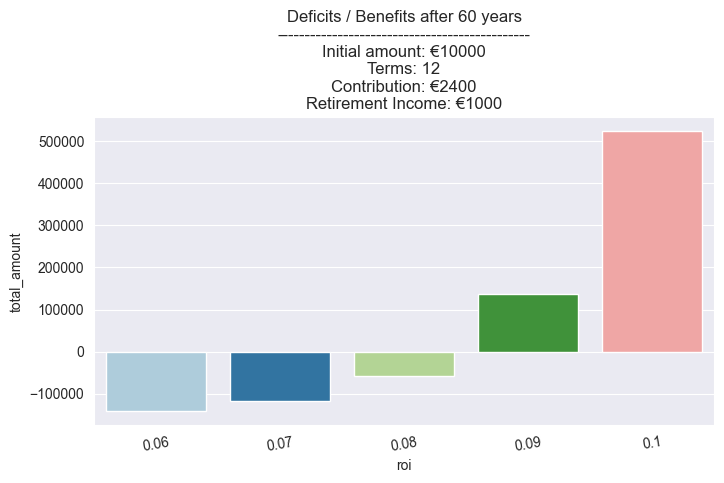

In [33]:
case_terms = 12
inc_contribution = 0.01
inflation_rate = 0.04

case_rois = three_cases[
    (three_cases["term"] == case_terms) & \
    (three_cases["retirement_income"] == retir_income) & \
    (three_cases["inc_contribution"] == inc_contribution) & \
    (three_cases["inflation_rate"] == inflation_rate)
][["roi", "total_amount"]].round(2)

print(f"Number of cases: {case_rois.shape[0]}")

plt.figure(figsize=(8, 4))
_ = sns.barplot(data=case_rois,
                x="roi",
                y="total_amount",
               )

title = f"Initial amount: {CURRENCY}{case_ini_amount}\nTerms: {case_terms}\nContribution: {CURRENCY}{case_annual_contribution}\nRetirement Income: {CURRENCY}{retir_income}"
_ = plt.title(f"Deficits / Benefits after {case_years} years\n----------------------------------------------\n"+ title)
_ = plt.xticks(rotation=10)

Moderated case:
- €10,000 initial amount
- 30 years of investment duration
- 12 months term
- €200 monthly contribution
- 3 % yearly contribution increment
- €1,000 of retirement income
- 10 % of income from retirement to contribution
- 3 % mean inflation rate

Number of cases: 5


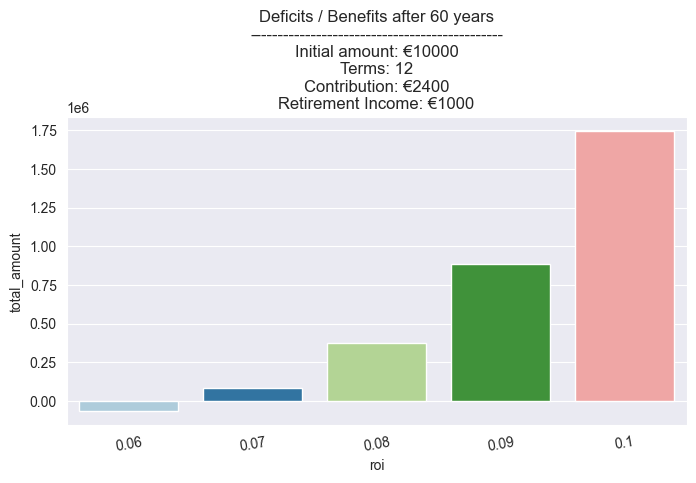

In [34]:
case_terms = 12
inc_contribution = 0.03
inflation_rate = 0.03

case_rois = three_cases[
    (three_cases["term"] == case_terms) & \
    (three_cases["retirement_income"] == retir_income) & \
    (three_cases["inc_contribution"] == inc_contribution) & \
    (three_cases["inflation_rate"] == inflation_rate)
][["roi", "total_amount"]].round(2)

print(f"Number of cases: {case_rois.shape[0]}")

plt.figure(figsize=(8, 4))
_ = sns.barplot(data=case_rois,
                x="roi",
                y="total_amount",
               )

title = f"Initial amount: {CURRENCY}{case_ini_amount}\nTerms: {case_terms}\nContribution: {CURRENCY}{case_annual_contribution}\nRetirement Income: {CURRENCY}{retir_income}"
_ = plt.title(f"Deficits / Benefits after {case_years} years\n----------------------------------------------\n"+ title)
_ = plt.xticks(rotation=10)

Optimistic case:
- €10,000 initial amount
- 30 years of investment duration
- 12 months term
- €200 monthly contribution
- 5 % yearly contribution increment
- €1,000 of retirement income
- 10 % of retirement income to contribution
- 2 % mean inflation rate

Number of cases: 5


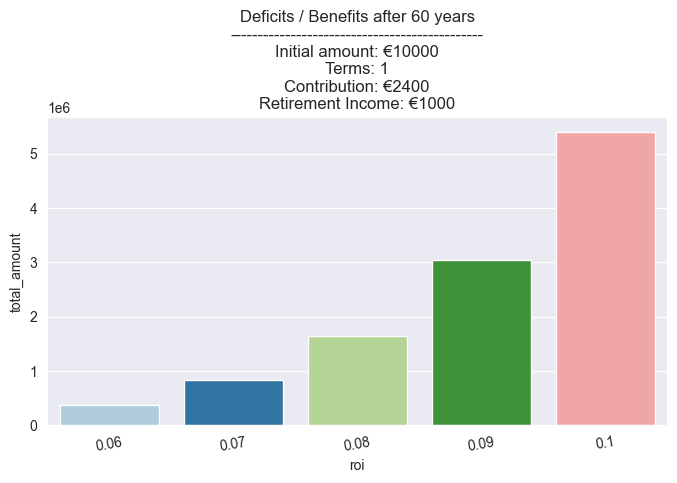

In [35]:
case_terms = 1
inc_contribution = 0.05
inflation_rate = 0.02

case_rois = three_cases[
    (three_cases["term"] == case_terms) & \
    (three_cases["retirement_income"] == retir_income) & \
    (three_cases["inc_contribution"] == inc_contribution) & \
    (three_cases["inflation_rate"] == inflation_rate)
][["roi", "total_amount"]].round(2)

print(f"Number of cases: {case_rois.shape[0]}")

plt.figure(figsize=(8, 4))
_ = sns.barplot(data=case_rois,
                x="roi",
                y="total_amount",
               )

title = f"Initial amount: {CURRENCY}{case_ini_amount}\nTerms: {case_terms}\nContribution: {CURRENCY}{case_annual_contribution}\nRetirement Income: {CURRENCY}{retir_income}"
_ = plt.title(f"Deficits / Benefits after {case_years} years\n----------------------------------------------\n"+ title)
_ = plt.xticks(rotation=10)